<a href="https://colab.research.google.com/github/diegorusso/deep-learning-from-scratch/blob/master/03_non_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear classification

Let's see an example of non-linear decision boundary. We need to classify a set of points being red or blue but it cannot be done with a straight line hence linear classification.



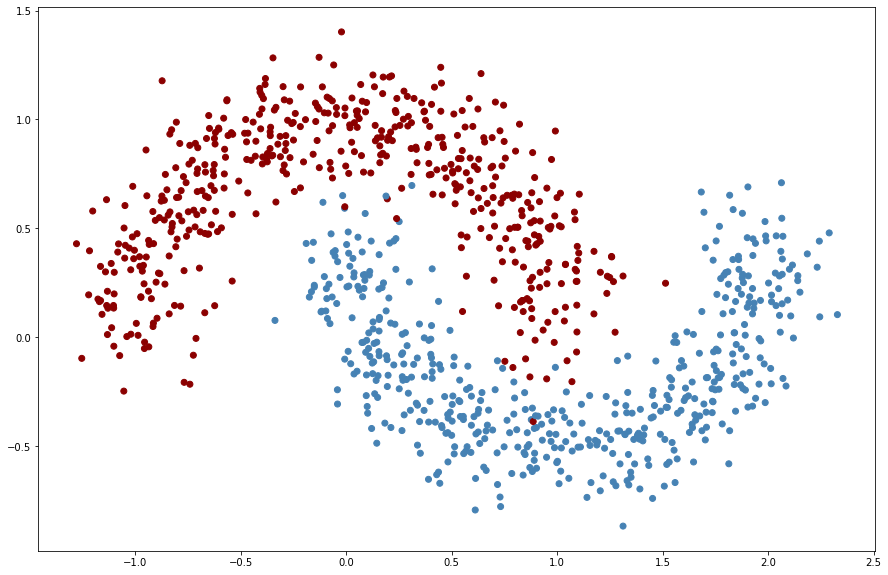

x.shape = (1000, 2) y.shape = (1000, 2)


In [2]:
%matplotlib inline
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

m = 1000

# make_moons() comes from sklearn package
train_x, train_y = datasets.make_moons(n_samples=m, noise=0.15, random_state=0)
colors = ['steelblue' if label == 1 else 'darkred' for label in train_y]
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=colors)
plt.show()

train_x = train_x.astype(np.float32)
train_y = to_categorical(train_y)

print('x.shape =', train_x.shape, 'y.shape =', train_y.shape)

If we were to use logistic regression the algorithm would try to draw a stright line to separate the red points from the blue ones and the points below the threshold as yellow.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________
Accuracy = 0.87


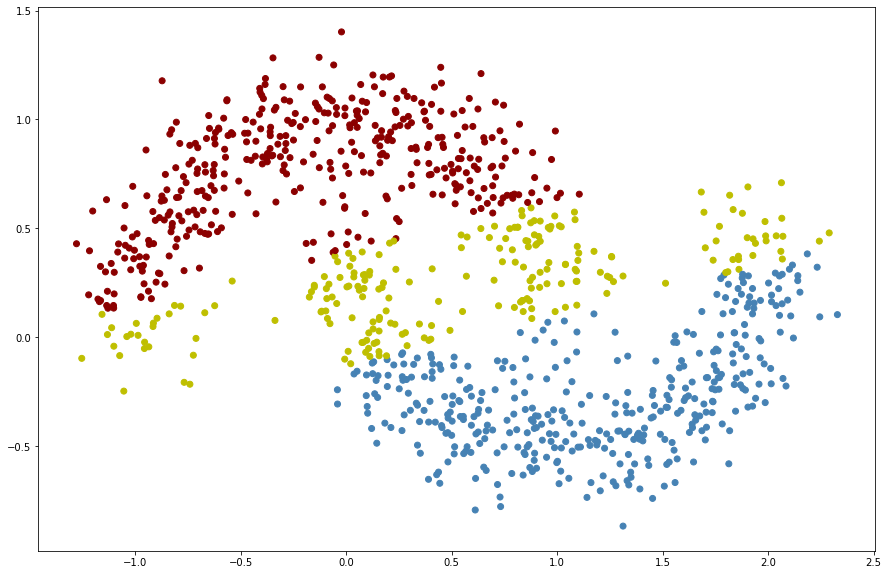

In [3]:
import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

n_features = 2
n_hidden = 8
n_labels = 2

model = Sequential()
model.add(Dense(input_shape=(n_features,), units=n_hidden))
model.add(Dense(units=n_labels, activation='softmax'))
model.summary()

# Binary crossentropy because we have only 2 categories
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10000, batch_size=m, verbose=0)

loss_and_acc = model.evaluate(train_x, train_y, batch_size=m, verbose=0)
print('Accuracy = {:4.2f}'.format(loss_and_acc[1]))

softmax = model.predict(train_x, batch_size=m)

c = []

for i in range(m):
    if softmax[i,0] > 0.8:
        c.append('darkred')
    elif softmax[i,1] > 0.8:
        c.append('steelblue')
    else:
        c.append('y')

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()

Logistic regression is not good: too much bias an too little variance.

To get a better fit to the data, we need a non-linear model. This could be easily done adding the activation function ReLU in the hidden layer.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________
Accuracy = 0.99


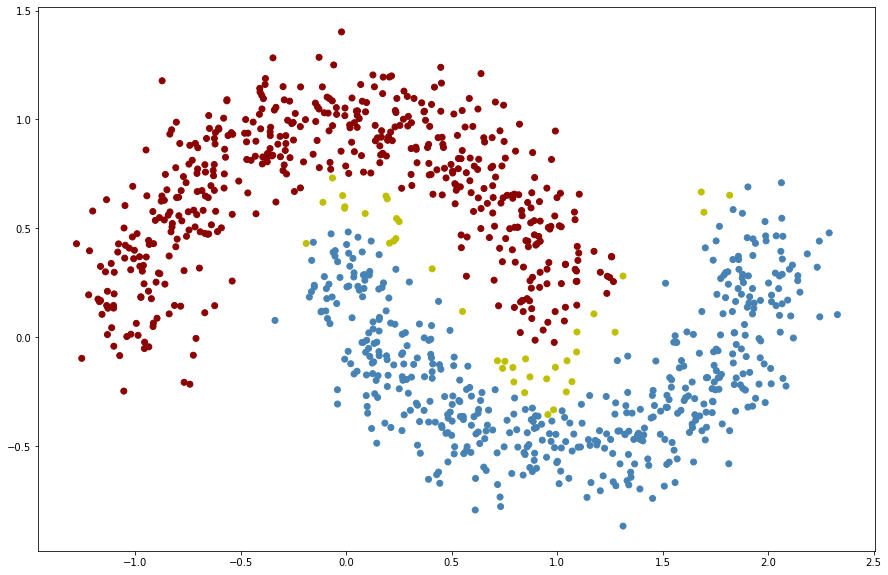

In [4]:
# %load answers/ex07.py

import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

n_features = 2
n_hidden = 16
n_labels = 2

model = Sequential()
# NOTE: WE HAVE CHANGED ONLY THE FOLLOWING LINE
model.add(Dense(input_shape=(n_features,), units=n_hidden, activation='relu'))
model.add(Dense(units=n_labels, activation='softmax'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10000, batch_size=m, verbose=0)

loss_and_acc = model.evaluate(train_x, train_y, batch_size=m, verbose=0)
print('Accuracy = {:4.2f}'.format(loss_and_acc[1]))

softmax = model.predict(train_x, batch_size=m)

c = []

for i in range(m):
    if softmax[i,0] > 0.8:
        c.append('darkred')
    elif softmax[i,1] > 0.8:
        c.append('steelblue')
    else:
        c.append('y')

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()


Et Voilà!

The model has now lower bias and high variance than the linear network.